In [31]:
import pandas as pd
data = pd.read_csv('processed_train_data.csv')
data

,Id,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street,Alley,LotShape,...,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,SalePrice
0,1,60,0,0,1,65.0,8450,1,0,0,...,0,0,0,0,1,0,0,0,1,208500
1,2,20,0,0,1,80.0,9600,1,0,0,...,0,0,1,0,0,0,0,0,1,181500
2,3,60,0,0,1,68.0,11250,1,0,1,...,0,0,0,0,1,0,0,0,1,223500
3,4,70,0,0,1,60.0,9550,1,0,1,...,0,0,0,0,0,0,0,0,1,140000
4,5,60,0,0,1,84.0,14260,1,0,1,...,0,0,1,0,0,0,0,0,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1455,20,1,0,0,62.0,7500,1,2,0,...,0,0,0,0,1,0,0,0,1,185000
1216,1456,60,0,0,1,62.0,7917,1,0,0,...,0,0,0,0,1,0,0,0,1,175000
1217,1457,20,0,0,1,85.0,13175,1,0,0,...,0,0,0,0,1,0,0,0,1,210000
1218,1459,20,0,0,1,68.0,9717,1,0,0,...,0,0,0,0,1,0,0,0,0,142125


In [59]:
ID, X, Y = data.iloc[:, 0], data.iloc[:, 1:-1], data.iloc[:,-1]
X

,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,...,Utilities_ELO,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,60,0,0,1,65.0,8450,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1,20,0,0,1,80.0,9600,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,60,0,0,1,68.0,11250,1,0,1,1,...,0,0,0,0,0,1,0,0,0,1
3,70,0,0,1,60.0,9550,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
4,60,0,0,1,84.0,14260,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,20,1,0,0,62.0,7500,1,2,0,1,...,0,0,0,0,0,1,0,0,0,1
1216,60,0,0,1,62.0,7917,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1217,20,0,0,1,85.0,13175,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
1218,20,0,0,1,68.0,9717,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = X.corr()

# plt.figure(figsize=(20, 15))
# sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f")
# plt.show()
cols = corr.columns
val = corr.values
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        if abs(val[i, j]) >= 0.5:
            focus = "*" * (int(abs(val[i, j]) * 10) - 5)
            print(f"{focus} -- {cols[i]} -- {cols[j]} -- {val[i, j]}")

** -- MSSubClass -- BldgType_0 -- 0.7976648557357184
* -- MSSubClass -- BldgType_2 -- -0.6256545319034352
*** -- MSZoning_1 -- MSZoning_2 -- -0.8131416905255339
 -- LotArea -- BldgType_0 -- -0.57594974704151
* -- Condition1_2 -- Condition1_3 -- -0.6008240987450278
**** -- Condition2_1 -- Condition2_3 -- -0.9124951847966614
*** -- BldgType_0 -- BldgType_2 -- -0.8462917142112859
*** -- BldgType_1 -- KitchenAbvGr -- 0.816832483050048
 -- HouseStyle -- 2ndFlrSF -- 0.5754399775467838
* -- OverallQual -- YearBuilt -- 0.6106640587371125
 -- OverallQual -- YearRemodAdd -- 0.5501674318036497
* -- OverallQual -- ExterQual -- -0.6921553280900482
 -- OverallQual -- Foundation_1 -- -0.5488305584348736
* -- OverallQual -- BsmtQual -- -0.6278976594701855
 -- OverallQual -- GrLivArea -- 0.5584634065392632
 -- OverallQual -- FullBath -- 0.5644379527072694
* -- OverallQual -- KitchenQual -- -0.635446012218117
 -- OverallQual -- GarageYrBlt -- 0.5608139825442638
 -- OverallQual -- GarageFinish -- -0.5152

86.56


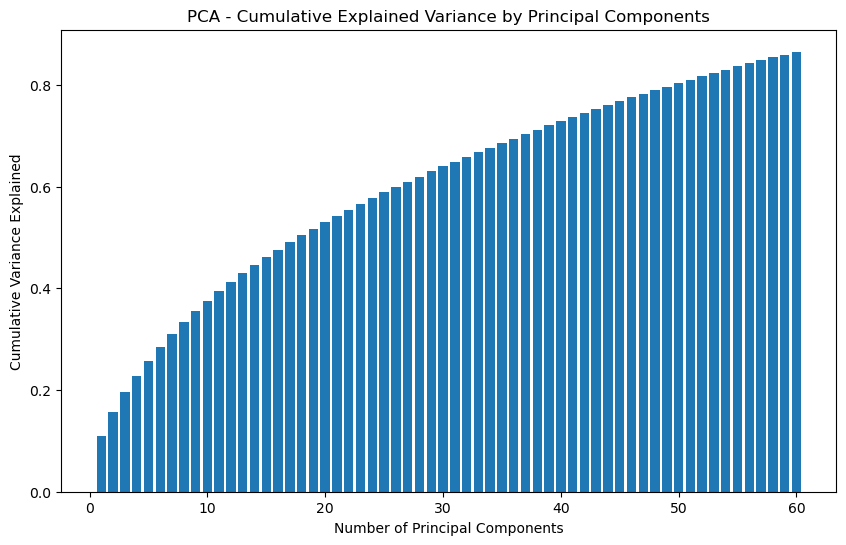

In [63]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

pca = PCA(n_components=60)
pca_result = pca.fit_transform(data_scaled)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()
print(f"{sum(explained_variance)*100:.2f}")

plt.figure(figsize=(10, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('PCA - Cumulative Explained Variance by Principal Components')
plt.show()


In [65]:
feature_contributions = pd.DataFrame(pca.components_, columns=X.columns)
feature_contributions

,MSSubClass,MSZoning_0,MSZoning_1,MSZoning_2,LotFrontage,LotArea,Street,Alley,LotShape,LandSlope,...,Utilities_ELO,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr
0,-0.033547,-0.038380,0.104018,-0.058443,-0.032723,-0.058535,-0.020115,0.029893,-0.075653,0.014109,...,0.0,0.000783,-0.027770,-0.016351,-0.009211,0.010998,0.059761,0.014461,0.0,-0.105288
1,0.209942,0.172850,0.165756,-0.242159,-0.058340,-0.223856,0.004004,0.161569,-0.068972,-0.046268,...,-0.0,-0.020936,-0.063600,-0.003276,0.019563,0.047129,0.048879,0.022994,-0.0,-0.046519
2,-0.106130,-0.059034,-0.043733,0.077527,0.119783,0.214280,0.003032,-0.011239,0.036168,0.002190,...,0.0,0.004619,-0.007167,-0.021776,-0.011700,-0.047685,0.088220,0.003553,0.0,-0.082262
3,0.305268,0.038945,0.028376,-0.054398,-0.161368,-0.077117,0.021620,0.025044,0.019405,0.027571,...,-0.0,0.011945,0.039633,0.025786,0.002424,-0.018741,-0.037670,-0.025158,-0.0,0.085241
4,0.172474,0.063505,0.006089,-0.034063,-0.052436,-0.107536,-0.012830,0.018917,-0.060150,-0.018760,...,-0.0,0.004903,-0.031988,0.005571,0.003213,0.033264,0.105358,-0.012345,-0.0,-0.048785
5,0.015038,0.042160,0.122629,-0.140326,0.025968,-0.005460,-0.013689,0.119388,-0.019910,0.077113,...,-0.0,-0.001861,-0.052577,-0.043276,0.019059,0.020591,-0.016956,0.016363,-0.0,-0.008608
6,-0.073002,-0.073319,-0.133188,0.152072,-0.056045,0.076216,0.026727,-0.109334,0.142121,-0.014477,...,-0.0,-0.007438,0.099083,0.036523,-0.032874,-0.096066,-0.028274,-0.005445,-0.0,0.061643
7,0.011584,-0.110817,0.074214,0.001113,-0.066521,0.003381,-0.036932,-0.009742,0.066711,0.129031,...,-0.0,-0.046958,0.031765,0.011583,0.053120,-0.013688,0.104690,0.040374,-0.0,-0.076788
8,0.039029,0.036384,0.138494,-0.149412,0.029645,-0.031864,-0.033752,0.023931,-0.019261,-0.093325,...,0.0,-0.042705,-0.025487,0.077325,0.177640,-0.078068,-0.099754,0.029064,0.0,0.064791
9,0.092138,0.016705,0.020271,0.000664,-0.018890,0.026652,-0.122351,0.028699,0.105985,0.317605,...,0.0,0.033094,0.012378,-0.049352,-0.003409,0.016976,0.004305,0.028254,0.0,-0.000973


In [66]:
pca_data = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,-3.443617,0.885088,0.060001,1.433146,-0.332686,-1.277646,1.395123,0.658829,0.673748,-0.966144,...,-0.762172,-0.191286,0.367237,0.044137,-0.024429,-0.057284,-0.182557,0.875721,-0.173546,-0.031059
1,0.597584,-2.447570,-0.731518,-0.400287,-1.398346,0.426334,0.334464,0.358059,1.891509,0.499644,...,0.083724,-0.127380,-0.389678,1.027233,-0.706669,0.433420,0.701396,-0.548115,0.565478,-0.832316
2,-4.018991,0.250877,0.490250,1.239013,-0.576552,-0.695081,1.239306,1.052225,0.134093,-0.435989,...,0.110823,0.323783,0.060885,0.282813,-0.511505,0.709972,0.229604,0.412603,-0.449623,-0.015642
3,0.182108,1.090379,1.137748,-0.128848,-1.727545,1.429598,-0.282432,-0.403661,-0.377202,2.190483,...,0.968785,1.534030,-0.035187,-0.203502,1.419628,0.956671,-0.307306,0.565450,1.763117,0.207638
4,-5.812396,-1.018686,2.394191,1.953136,-0.447927,-0.666680,0.250901,0.779341,1.252272,-0.346136,...,1.113524,0.944906,-0.155655,1.169430,0.087470,-0.069080,-0.466316,-0.404874,-0.142100,0.600211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,-2.370245,3.121148,-2.036119,-1.693048,0.407132,0.543404,0.504539,-0.103167,0.816294,-0.826743,...,0.677999,-0.005519,-1.221679,0.431148,-0.428439,0.754507,0.299204,0.139225,0.544033,-0.483023
1216,-1.874517,2.275062,1.357958,0.685234,-1.436094,-0.585661,1.840135,-0.648093,-1.399266,-0.840715,...,0.425551,0.006291,-0.053548,-0.406394,0.385312,-0.079278,-0.247581,0.221054,0.527675,0.390822
1217,-1.424239,-4.495274,0.217961,-0.312764,0.932910,0.143864,-0.664589,0.007223,0.586506,0.626182,...,0.456151,-1.245547,-1.056821,0.052982,-0.303396,-0.387683,-0.170012,-0.627741,1.235724,-0.392320
1218,3.906205,-2.848997,-2.494590,-1.729813,-0.397550,1.581040,-0.488429,0.940385,-0.104123,-0.967435,...,0.724486,-0.290513,0.947852,0.225441,-0.915314,0.795637,1.026774,-0.527208,0.455495,-0.041252


In [67]:
PCA_DATA = pd.concat([ID, pca_data, Y], axis=1)
PCA_DATA

,Id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,SalePrice
0,1,-3.443617,0.885088,0.060001,1.433146,-0.332686,-1.277646,1.395123,0.658829,0.673748,...,-0.191286,0.367237,0.044137,-0.024429,-0.057284,-0.182557,0.875721,-0.173546,-0.031059,208500
1,2,0.597584,-2.447570,-0.731518,-0.400287,-1.398346,0.426334,0.334464,0.358059,1.891509,...,-0.127380,-0.389678,1.027233,-0.706669,0.433420,0.701396,-0.548115,0.565478,-0.832316,181500
2,3,-4.018991,0.250877,0.490250,1.239013,-0.576552,-0.695081,1.239306,1.052225,0.134093,...,0.323783,0.060885,0.282813,-0.511505,0.709972,0.229604,0.412603,-0.449623,-0.015642,223500
3,4,0.182108,1.090379,1.137748,-0.128848,-1.727545,1.429598,-0.282432,-0.403661,-0.377202,...,1.534030,-0.035187,-0.203502,1.419628,0.956671,-0.307306,0.565450,1.763117,0.207638,140000
4,5,-5.812396,-1.018686,2.394191,1.953136,-0.447927,-0.666680,0.250901,0.779341,1.252272,...,0.944906,-0.155655,1.169430,0.087470,-0.069080,-0.466316,-0.404874,-0.142100,0.600211,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215,1455,-2.370245,3.121148,-2.036119,-1.693048,0.407132,0.543404,0.504539,-0.103167,0.816294,...,-0.005519,-1.221679,0.431148,-0.428439,0.754507,0.299204,0.139225,0.544033,-0.483023,185000
1216,1456,-1.874517,2.275062,1.357958,0.685234,-1.436094,-0.585661,1.840135,-0.648093,-1.399266,...,0.006291,-0.053548,-0.406394,0.385312,-0.079278,-0.247581,0.221054,0.527675,0.390822,175000
1217,1457,-1.424239,-4.495274,0.217961,-0.312764,0.932910,0.143864,-0.664589,0.007223,0.586506,...,-1.245547,-1.056821,0.052982,-0.303396,-0.387683,-0.170012,-0.627741,1.235724,-0.392320,210000
1218,1459,3.906205,-2.848997,-2.494590,-1.729813,-0.397550,1.581040,-0.488429,0.940385,-0.104123,...,-0.290513,0.947852,0.225441,-0.915314,0.795637,1.026774,-0.527208,0.455495,-0.041252,142125


In [68]:
PCA_DATA.to_csv('pca_data.csv', index=False)

In [72]:
test = pd.read_csv('processed_test_data.csv')
ID_test, X_test = test.iloc[:, 0], test.iloc[:, 1:]
test_scal = scaler.transform(X_test)
PCA_T = pca.transform(X_test)
PCA_TEST  = pd.DataFrame(pca_result, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
PCA_TEST = pd.concat([ID_test, PCA_TEST], axis=1)
PCA_TEST

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Id,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60
0,1461,-3.443617,0.885088,0.060001,1.433146,-0.332686,-1.277646,1.395123,0.658829,0.673748,...,-0.762172,-0.191286,0.367237,0.044137,-0.024429,-0.057284,-0.182557,0.875721,-0.173546,-0.031059
1,1462,0.597584,-2.447570,-0.731518,-0.400287,-1.398346,0.426334,0.334464,0.358059,1.891509,...,0.083724,-0.127380,-0.389678,1.027233,-0.706669,0.433420,0.701396,-0.548115,0.565478,-0.832316
2,1463,-4.018991,0.250877,0.490250,1.239013,-0.576552,-0.695081,1.239306,1.052225,0.134093,...,0.110823,0.323783,0.060885,0.282813,-0.511505,0.709972,0.229604,0.412603,-0.449623,-0.015642
3,1464,0.182108,1.090379,1.137748,-0.128848,-1.727545,1.429598,-0.282432,-0.403661,-0.377202,...,0.968785,1.534030,-0.035187,-0.203502,1.419628,0.956671,-0.307306,0.565450,1.763117,0.207638
4,1465,-5.812396,-1.018686,2.394191,1.953136,-0.447927,-0.666680,0.250901,0.779341,1.252272,...,1.113524,0.944906,-0.155655,1.169430,0.087470,-0.069080,-0.466316,-0.404874,-0.142100,0.600211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,2916,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2917,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1457,2918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
PCA_TEST.to_csv('pca_test.csv', index=False)